## Google Colab Setup

In [0]:
%matplotlib inline

In [2]:
!pip install torch torchvision
!pip install --no-cache-dir -I pillow
!pip install GPUtil 

    100% |████████████████████████████████| 2.0MB 24.5MB/s 
imgaug 0.2.8 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.


In [3]:
!pip install torch torchvision

In [4]:
!curl https://course-v3.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   287  100   287    0     0    767      0 --:--:-- --:--:-- --:--:--   765
bash: line 1: syntax error near unexpected token `newline'
bash: line 1: `<!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">'


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from fastai import *
from fastai.vision import *

In [7]:
ls

drive/  sample_data/


In [8]:
cd drive/"My Drive"/datasets

/content/drive/My Drive/datasets


In [9]:
ls

CNNonMusicData.ipynb  data/  img_data/


## ResNet34

In [10]:
path = "img_data/"
bs = 32 
data = ImageDataBunch.from_folder(path, valid_pct=0.3, bs=bs)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (705 items)
x: ImageItemList
Image (3, 720, 720),Image (3, 720, 720),Image (3, 720, 720),Image (3, 720, 720),Image (3, 720, 720)
y: CategoryList
metal,metal,metal,metal,metal
Path: img_data;

Valid: LabelList (302 items)
x: ImageItemList
Image (3, 720, 720),Image (3, 720, 720),Image (3, 720, 720),Image (3, 720, 720),Image (3, 720, 720)
y: CategoryList
country,jazz,pop,country,metal
Path: img_data;

Test: None

In [11]:
print(data.classes)
len(data.classes),data.c

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


(10, 10)

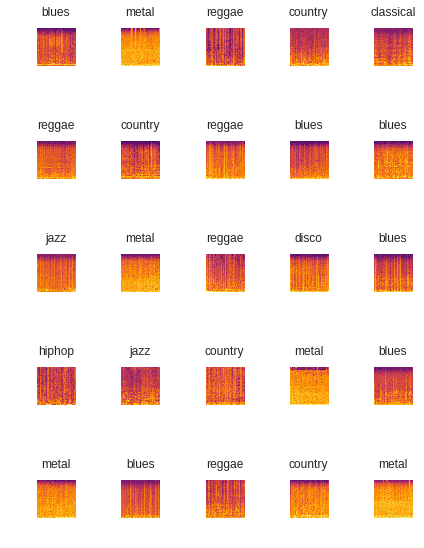

In [23]:
data.show_batch(rows=5, figsize=(6,8))

In [13]:
learner = create_cnn(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:00, 93602480.99it/s]


In [24]:
learner.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy
1,0.414336,0.940195,0.698676
2,0.379337,0.947159,0.682119
3,0.324776,0.973347,0.695364
4,0.300850,0.999516,0.701987
5,0.264011,1.086295,0.678808
6,0.219779,1.034387,0.695364
7,0.179967,1.042790,0.688742
8,0.147363,1.039860,0.698676
9,0.132927,1.039238,0.698676
10,0.116892,1.027379,0.705298


In [0]:
learner.save('resnet34_mtag75')

In [0]:
interp = ClassificationInterpretation.from_learner(learner)

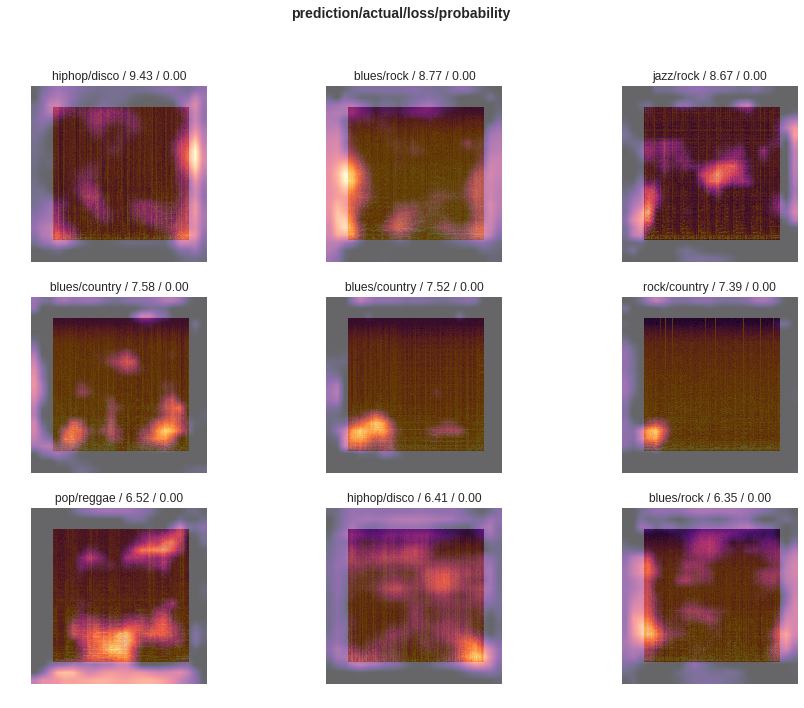

In [27]:
interp.plot_top_losses(9, figsize=(15,11))

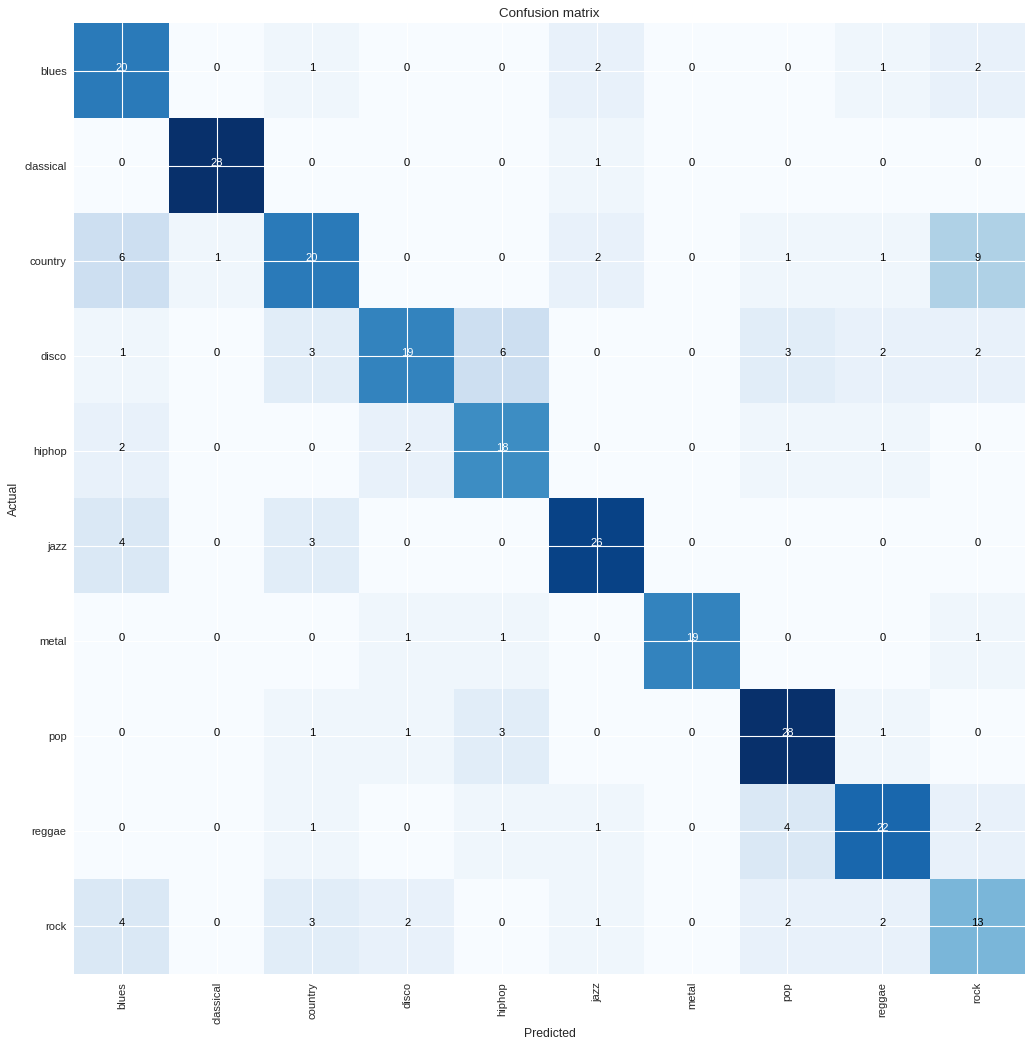

In [28]:
interp.plot_confusion_matrix(figsize=(13,13), dpi=80)

In [29]:
interp.most_confused(min_val=2)

[('country', 'rock', 9),
 ('country', 'blues', 6),
 ('disco', 'hiphop', 6),
 ('jazz', 'blues', 4),
 ('reggae', 'pop', 4),
 ('rock', 'blues', 4),
 ('disco', 'country', 3),
 ('disco', 'pop', 3),
 ('jazz', 'country', 3),
 ('pop', 'hiphop', 3),
 ('rock', 'country', 3)]

The above code is pretty self explanatory and all credits to fastai library! 

## ResNet50

In [31]:
path = "img_data/"
bs = 8
data = ImageDataBunch.from_folder(path, valid_pct=0.3, bs=bs)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (705 items)
x: ImageItemList
Image (3, 720, 720),Image (3, 720, 720),Image (3, 720, 720),Image (3, 720, 720),Image (3, 720, 720)
y: CategoryList
metal,metal,metal,metal,metal
Path: img_data;

Valid: LabelList (302 items)
x: ImageItemList
Image (3, 720, 720),Image (3, 720, 720),Image (3, 720, 720),Image (3, 720, 720),Image (3, 720, 720)
y: CategoryList
hiphop,hiphop,reggae,classical,reggae
Path: img_data;

Test: None

In [32]:
print(data.classes)
len(data.classes),data.c

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


(10, 10)

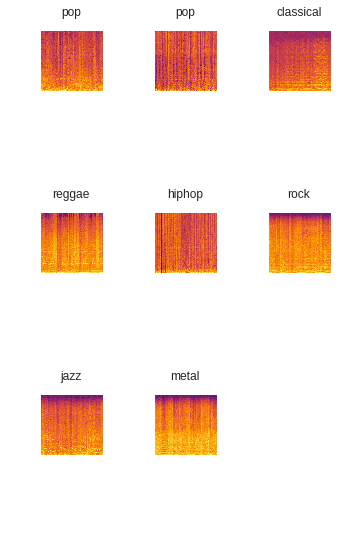

In [33]:
data.show_batch(rows=3, figsize=(5,8))

In [34]:
res50 = create_cnn(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
102502400it [00:02, 38812262.51it/s]


In [35]:
res50.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy
1,1.766753,1.242611,0.539735
2,1.286090,1.215348,0.609272
3,0.984094,1.014828,0.625828
4,0.723331,0.926237,0.682119


In [36]:
res50.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy
1,0.595889,1.142476,0.635762
2,0.849141,2.272903,0.486755
3,0.771680,1.056834,0.682119
4,0.538569,1.229993,0.622517
5,0.399549,1.061891,0.658940


In [0]:
res50.save('ResNet50_80')

In [0]:
interp = ClassificationInterpretation.from_learner(res50)

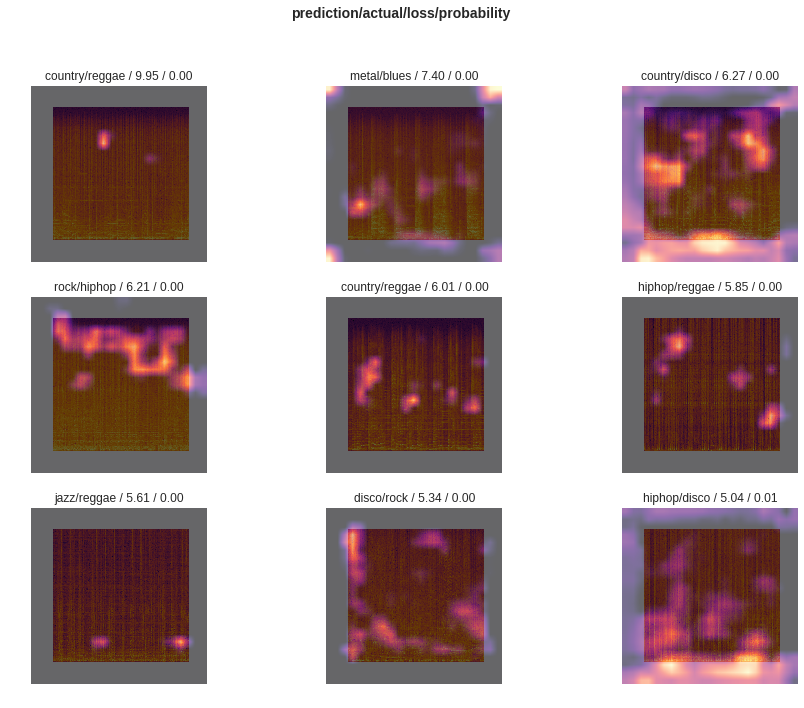

In [39]:
interp.plot_top_losses(9, figsize=(15,11))

The plots of rock and country looks pretty similar (first two of third row). 

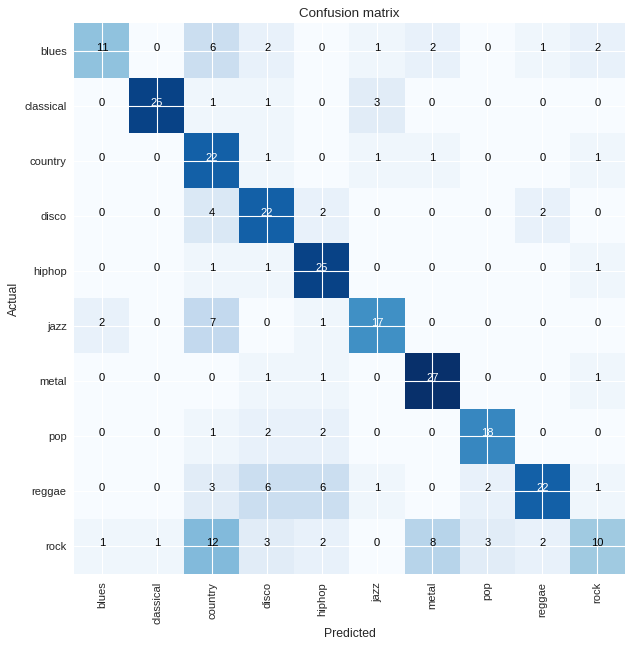

In [40]:
interp.plot_confusion_matrix(figsize=(8,8), dpi=80)

In [41]:
interp.most_confused(min_val=3)

[('rock', 'country', 12),
 ('rock', 'metal', 8),
 ('jazz', 'country', 7),
 ('blues', 'country', 6),
 ('reggae', 'disco', 6),
 ('reggae', 'hiphop', 6),
 ('disco', 'country', 4)]

## Colab memory check

In [45]:
# # memory footprint support libraries/code
# !ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
# !pip install gputil
# !pip install psutil
# !pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
  process = psutil.Process(os.getpid())
  print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
  print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

Gen RAM Free: 11.8 GB  | Proc size: 3.3 GB
GPU RAM Free: 9898MB | Used: 1543MB | Util  13% | Total 11441MB
